In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#data from https://wcc.sc.egov.usda.gov/nwcc/rgrpt?report=precsnotelmon&state=UT&operation=View
#number of stations = 7
nos = 7
#Figure 4.1
pd.set_option('display.float_format', lambda x: '%.1f' % x)
#read the csv to pandas
snow = pd.read_csv("../data/snotel_wtr_yr_2021.csv")
#convert to cm
snow = snow.apply(lambda x: x*2.54 if x.name in ['TGL','BLP','BLT','FRM','PAR','TIM','PAY'] else x)
stns=list(snow)
print(stns[1:nos+1])
snow


['TGL', 'BLP', 'BLT', 'FRM', 'PAR', 'TIM', 'PAY']


YEAR   TGL   BLP   BLT   FRM   PAR   TIM  PAY
0   1981  88.9 100.8  67.8  86.6  70.6  85.6 52.8
1   1982 206.2 183.4 146.3 177.8 104.6 131.3 83.6
2   1983 140.2 212.3 145.0 165.4 104.6 125.0 88.6
3   1984 157.5 257.0 141.5 166.6 110.2 104.1 89.9
4   1985 112.8 143.3 102.6 118.9  89.2 111.8 72.4
5   1986 175.3 235.7 161.5 172.0  98.0 138.7 81.0
6   1987  74.7 119.6  87.1  74.9  59.4  63.2 57.9
7   1988  90.2 103.9  74.9  81.3  56.4  53.3 55.6
8   1989 126.7 131.8 100.1 119.1  78.7  70.6 51.8
9   1990  88.6 106.2  84.3  88.4  61.7  91.7 53.1
10  1991 102.1 116.1  88.4 108.5  77.0  78.5 56.4
11  1992  86.6  81.8  66.0  88.6  59.7  58.4 50.0
12  1993 150.6 197.1 145.8 158.2 102.6 129.8 81.3
13  1994  88.1  97.0  80.3 104.1  69.8  72.1 54.1
14  1995 126.7 181.4 117.6 166.6 107.4 122.2 90.4
15  1996 131.3 125.0  93.2 119.4  81.5  77.5 59.9
16  1997 175.0 200.2 134.1 156.2  96.5 115.3 73.7
17  1998 120.4 184.7 113.8 169.4  95.2 104.9 91.7
18  1999 126.0 140.0  97.3 130.3  92.2  93.7 66.8
19  2000  95.0 115.1  79.8 106.4  65.5  68.6 50.8
20  2001  87.6 108.0  73.2 109.2  63.5  63.2 50.3
21  2002  94.5 120.1  88.1 117.3  70.9  69.8 45.7
22  2003 103.1  95.8  70.1  87.9  60.5  62.7 58.7
23  2004 103.1 132.6  89.7 133.9  76.5  76.5 63.2
24  2005 117.1 209.8 150.4 167.6  94.0 139.4 81.0
25  2006 134.1 184.2 135.4 158.2  96.5  99.8 65.0
26  2007  79.0 105.7  79.2 105.2  65.3  63.5 46.5
27  2008 114.6 130.6  93.2 124.2  80.3  79.2 65.3
28  2009 133.9 184.7 130.3 148.8  86.4 111.0 71.4
29  2010 106.2 120.4  80.3 112.0  79.5  88.9 61.5
30  2011 177.8 209.8 161.8 188.0 119.1 156.2 85.9
31  2012  96.3 108.5  82.5  80.5  55.4  66.3 49.5
32  2013  84.3  89.7  60.7  96.8  72.6  61.7 48.8
33  2014 132.8 121.4  95.2 105.4  77.7  70.1 51.8
34  2015 100.8 106.4  79.5 108.7  66.8  58.9 45.0
35  2016 113.0 112.0  83.8 103.9  67.8  73.9 50.5
36  2017 202.9 193.3 156.0 151.6  90.7 126.2 63.5
37  2018 100.8  75.4  66.8  70.9  58.4  57.1 42.2
38  2019 121.4 182.9 128.5 154.4  93.7 126.7 87.1
39  2020 120.1  91.2  67.6  95.5  66.8  58.9 43.4
40  2021  72.6  50.3  48.0  70.9  52.6  47.5 33.5

xm,ym: 101.2 140.6
xs,ys: 31.3 48.3


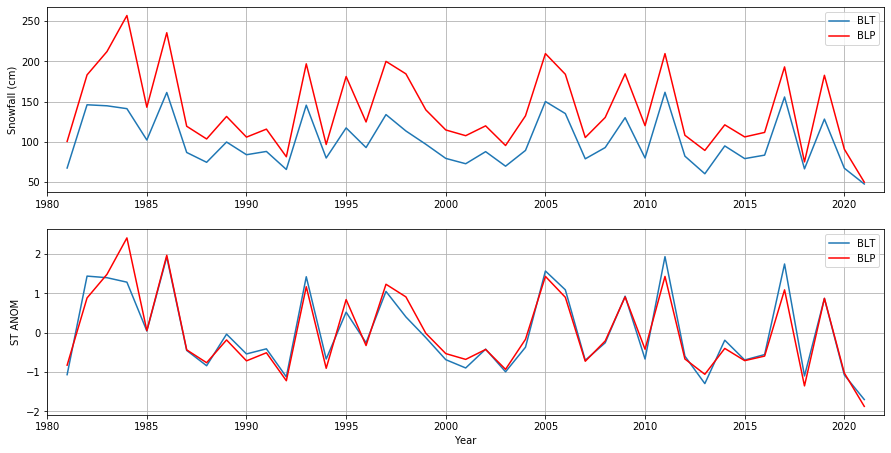

In [3]:
#plot totals
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow['YEAR'],snow['TGL'],label='TGL')
ax1.plot(snow['YEAR'],snow['PAY'],color='red',label='BLP')
ax1.set_ylabel('Snowfall (cm)')
ax1.set(xlim=(1980,2022))
ax1.grid()
ax1.legend()

#match notes - set BLT and BLP to x and y
x = snow['BLT']
y = snow['BLP']

#get means
xm = np.mean(x)
ym = np.mean(y)

#get st devs
xs = np.std(x)
ys = np.std(y)
print('xm,ym: %.1f %.1f' % (xm,ym))
print('xs,ys: %.1f %.1f' % (xs,ys))


#get anomalies
xprime = x - xm
yprime = y - ym

#standardize anomalies
xstar = xprime/xs
ystar = yprime/ys

#plot anomalies
ax2.plot(snow['YEAR'],xstar,label='BLT')
ax2.plot(snow['YEAR'],ystar,label='BLP',color='red')
ax2.legend()
ax2.set(xlim=(1980,2022))
ax2.grid()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')
plt.savefig('figure_4.2.png')

In [4]:
#Brute force regression for two variables
covar_1 = 0
varx_1 = 0
vary_1 = 0
#n is number of years
n = len(snow)
for i in range(0,n):
    covar_1 = covar_1 + xprime[i]*yprime[i]
    varx_1 = varx_1 + xprime[i]*xprime[i]
    vary_1 = vary_1 + yprime[i]*yprime[i]

covar_1 = covar_1/n
varx_1 = varx_1/n
vary_1 = vary_1/n

b_1 = covar_1/varx_1
r_1 = covar_1/np.sqrt(varx_1*vary_1)
sdx_1 = np.sqrt(varx_1)
sdy_1 = np.sqrt(vary_1)

#using linear algebra
covar_2 = np.dot(xprime,yprime)
varx_2 = np.dot(xprime,xprime)
vary_2 = np.dot(yprime,yprime)
covar_2 = covar_2/n
varx_2 = varx_2/n
vary_2 = vary_2/n

b_2 = covar_2/varx_2
r_2 = covar_2/np.sqrt(varx_2*vary_2)
sdx_2 = np.sqrt(varx_2)
sdy_2 = np.sqrt(vary_2)
print('slopes: %.1f %.1f' % (b_1,b_2))
print('correlations: %.2f %.2f' % (r_1,r_2))
print('explained variance: %.1f' % (r_1*r_1*100))
print('unexplained variance: %.1f' % (100*(1-r_1*r_1)))

slopes: 1.5 1.5
correlations: 0.96 0.96
explained variance: 91.9
unexplained variance: 8.1


In [5]:
#use pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
vals = snow[['BLP','BLT']]
#print(vals)
#Pearson correlation: not robust and reliant but most commonly used
r_pc= vals.corr(method='pearson')
print(r_pc)
#Spearman correlation: robust and reliant, sorts the values first and then compares
r_sc= vals.corr(method='spearman')
print(r_sc)

     BLP  BLT
BLP 1.00 0.96
BLT 0.96 1.00
     BLP  BLT
BLP 1.00 0.96
BLT 0.96 1.00


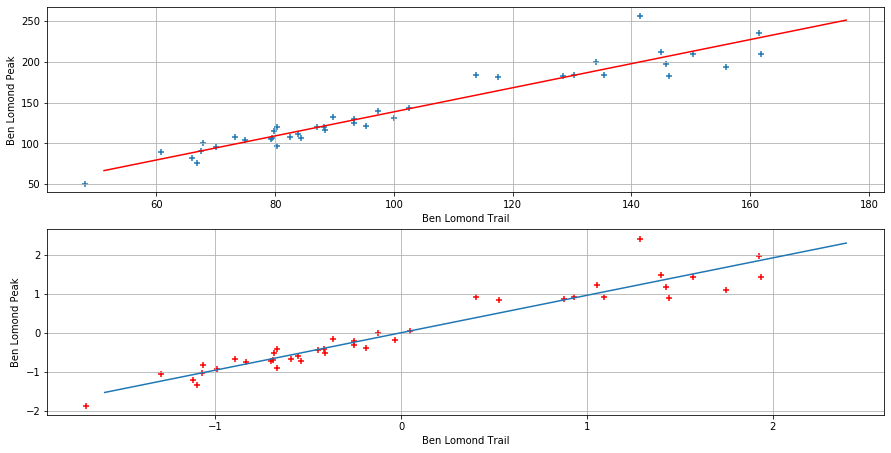

In [6]:
#compute estimate of y over range of x's
xhat = np.linspace(-50,75,100)
yhat = b_2*xhat

XH = xm+xhat
YH = ym+yhat
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.scatter(x,y,marker='+')
ax1.plot(XH,YH,color='red')
ax1.grid()
ax1.set_xlabel('Ben Lomond Trail')
ax1.set_ylabel('Ben Lomond Peak')
ax2.scatter(xstar,ystar,marker='+',color='red')
ax2.plot(xhat/xs,yhat/ys)
ax2.grid()
ax2.set_xlabel('Ben Lomond Trail')
ax2.set_ylabel('Ben Lomond Peak')
plt.savefig('figure_4.3.png')

     sin  cos
sin 1.00 0.00
cos 0.00 1.00
     sin  cos
sin 1.00 0.00
cos 0.00 1.00
       amp_1  amp_2
amp_1   1.00  -1.00
amp_2  -1.00   1.00
       amp_1  amp_2
amp_1   1.00  -1.00
amp_2  -1.00   1.00


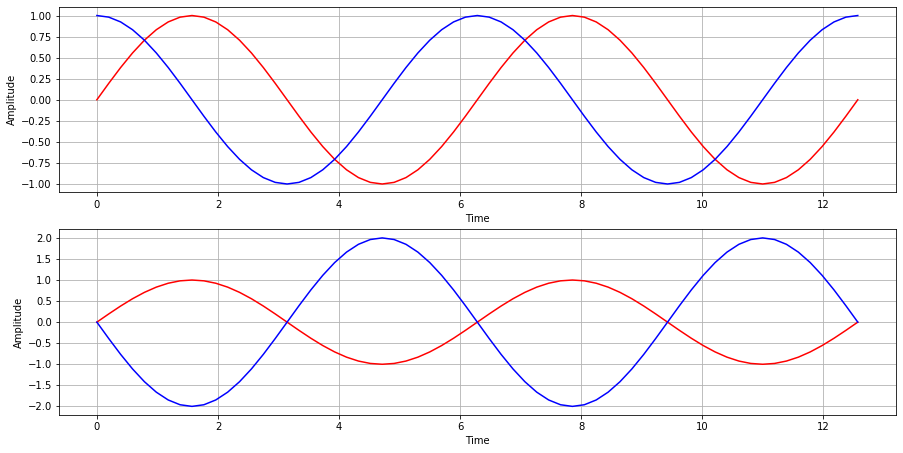

In [7]:
# show that two time series in quadrature in time (out of phase by 90 degrees) 
# have a linear correlation of zero
time = np.arange(0, 4 * np.pi+np.pi/16, np.pi/16.);
amp_sin_1 = np.sin(time)
amp_cos_1 = np.cos(time)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(time,amp_sin_1,color='red')
ax1.plot(time,amp_cos_1,color='blue')
ax1.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

amp_vals_1 = pd.DataFrame()
amp_vals_1['sin'] = amp_sin_1
amp_vals_1['cos'] = amp_cos_1
#print(amp_vals_1)

#Pearson correlation: not robust and reliant but most commonly used
#note that in the 2x2 matrix returned, the diagonal values are 1
# as those are the correlations with the same time series
# and the off diagonal elements are the same and the correlations
# between the two different time series
r_pc_amp_1= amp_vals_1.corr(method='pearson')
print(r_pc_amp_1)
#Spearman correlation: robust and reliant, sorts the values first and then compares
r_sc_amp_1= amp_vals_1.corr(method='spearman')
print(r_sc_amp_1)

# show that two time series in phase with very different amplitudes
# have a linear correlation of one
amp_sin_2 = -2*np.sin(time)

ax2.plot(time,amp_sin_1,color='red')
ax2.plot(time,amp_sin_2,color='blue')
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

amp_vals_2 = pd.DataFrame()
amp_vals_2['amp_1'] = amp_sin_1
amp_vals_2['amp_2'] = amp_sin_2
#print(amp_vals_2)
#Pearson correlation: not robust and reliant but most commonly used
r_pc_amp_2= amp_vals_2.corr(method='pearson')
print(r_pc_amp_2)
#Spearman correlation: robust and reliant, sorts the values first and then compares
r_sc_amp_2= amp_vals_2.corr(method='spearman')
print(r_sc_amp_2)

plt.savefig('figure_4.4.png')



means TGL   118.52
BLP   140.60
BLT   101.17
FRM   123.17
PAR    79.90
TIM    89.13
PAY    62.73
dtype: float64
stds TGL   32.86
BLP   48.27
BLT   31.32
FRM   33.39
PAR   17.31
TIM   28.67
PAY   15.65
dtype: float64


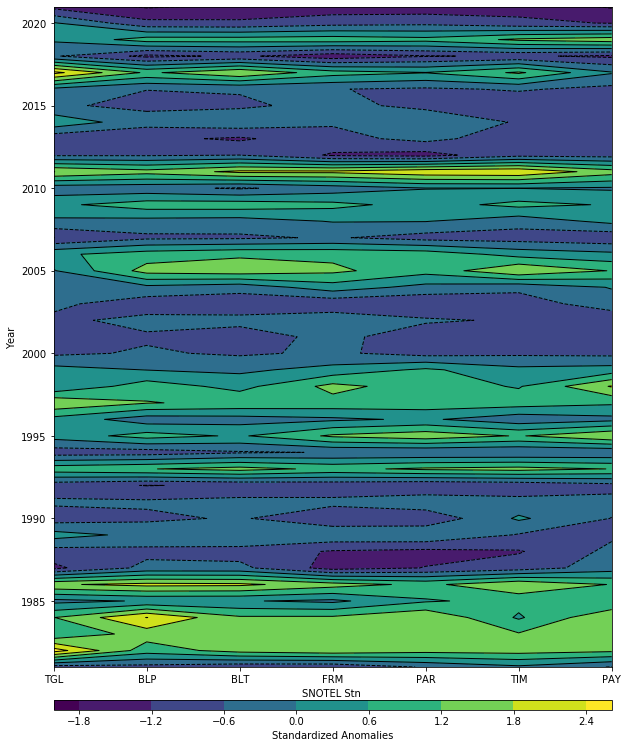

In [8]:
#Figure 4.5 - hovmuller diagram of standardized temporal anomalies

#create dataframe without the year column
xt = snow.drop('YEAR',axis=1)
xtm = xt.mean(axis=0)
xts = np.std(xt)
print ('means',xtm)
print('stds',xts)

# fill dataframe with anomalies
xtp = pd.DataFrame()
for col in list(xt.columns):
    xtp[col] = xt[col].apply(lambda x : x - xtm[col])

#fill dataframe with standardized anomalies
xstar  = pd.DataFrame()
for col in list(xtp.columns):
    xstar[col] = xtp[col].apply(lambda x : x/xts[col])

fig,ax = plt.subplots(figsize=(10,15))
#ax.invert_yaxis()

cf = ax.contourf(np.arange(1,nos+1,1),snow['YEAR'],xstar,extend='both')
cs = ax.contour(np.arange(1,nos+1,1),snow['YEAR'],xstar,colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
ax.set_xticks(np.arange(1,nos+1))
ax.set_xticklabels(stns[1:nos+1])
ax.set_xlabel('SNOTEL Stn ')
ax.set_ylabel('Year')
cbar.set_label('Standardized Anomalies')
plt.savefig('figure_4.5.png')

     TGL  BLP  BLT  FRM  PAR  TIM  PAY
TGL 1.00 0.78 0.85 0.79 0.80 0.77 0.65
BLP 0.78 1.00 0.96 0.93 0.91 0.89 0.90
BLT 0.85 0.96 1.00 0.92 0.89 0.93 0.84
FRM 0.79 0.93 0.92 1.00 0.95 0.89 0.88
PAR 0.80 0.91 0.89 0.95 1.00 0.90 0.89
TIM 0.77 0.89 0.93 0.89 0.90 1.00 0.87
PAY 0.65 0.90 0.84 0.88 0.89 0.87 1.00


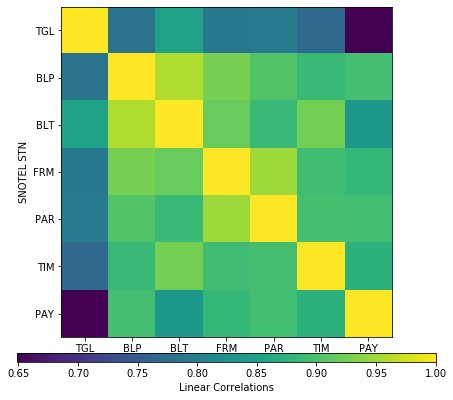

In [9]:
#compute correlation between each time series (don't need to use anomalies or std anomalies)
cors=xt.corr()
print(cors)
fig,ax = plt.subplots(figsize=(7.5,7.5))
cf = ax.imshow(cors)
ax.set_xticks(np.arange(0,nos))
ax.set_yticks(np.arange(0,nos))
ax.set_xticklabels(stns[1:nos+1])
ax.set_yticklabels(stns[1:nos+1])
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)

#ax.set_xlabel('SNOTEL STN')
ax.set_ylabel('SNOTEL STN')

cbar.set_label('Linear Correlations')
plt.savefig('figure_4.6.png')

In [10]:
#cross validation using skikit-learn modules
import sklearn.linear_model as skl_lm
import sklearn.metrics as skl_met 
import sklearn.model_selection as skl_sel 

In [11]:
#get the TGL and PAY time series
x = snow['TGL'].values.reshape(-1,1)
y = snow['PAY']
t = snow['YEAR']

In [12]:
#compute rmse test metric using the entire data set for reference
#introduce coefficient of determination as a means of the usefulness of the prediction
#for the test metric
#create a linear regression object
lm_all = skl_lm.LinearRegression()
#fit linearly using the entire data set
n_tot = len(y)
print('total number of years',n_tot)
lm_all.fit(x,y)
# Estimate using the entire data set. 
y_est_all = lm_all.predict(x)
rmse_all = np.sqrt(skl_met.mean_squared_error(y, y_est_all))
print('root mean squared error: %.2f'% rmse_all)
#coefficient of determination is a measure of the "goodness of the fit"
# The coefficient of determination: 1 is perfect prediction. 0 Awful. Can be negative meaning even worse
print('Coefficient of determination: %.2f' % skl_met.r2_score(y, y_est_all))

total number of years 41
root mean squared error: 11.91
Coefficient of determination: 0.42


In [13]:
#split the time series up into two samples. In this case of 50% in the training data set, 50% in the testing set
X_train, X_test, y_train, y_test = skl_sel.train_test_split(x, y, train_size=0.5, random_state=1)
n_train = len(y_train)
n_test = len(y_test)
print('total number of years in training and test data sets',n_train,n_test)
#create another regression object
lm = skl_lm.LinearRegression()
#fit linearly using the training data set
lm.fit(X_train,y_train)
# Estimate using the test data set 
y_est = lm.predict(X_test)
rmse = np.sqrt(skl_met.mean_squared_error(y_test, y_est))
print('root mean squared error: %.2f'% rmse)
# The coefficient of determination: 1 is perfect prediction. 0 Awful. Can be negative meaning even worse
print('Coefficient of determination: %.2f' % skl_met.r2_score(y_test, y_est))

total number of years in training and test data sets 20 21
root mean squared error: 14.92
Coefficient of determination: 0.26


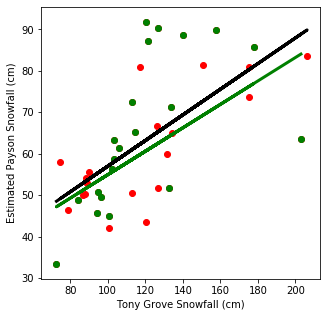

In [14]:
# Plot outputs
fig,ax = plt.subplots(figsize=(5,5))
#plot all the values
plt.scatter(x,y,color='red')
#linear estimate based on entire data set
plt.plot(x, y_est_all, color='black', linewidth=3)
#overwrite independent cases
plt.scatter(X_test, y_test,  color='green')
#linear estimate based on the training data set
plt.plot(X_test, y_est, color='green', linewidth=3)
ax.set_xlabel('Tony Grove Snowfall (cm)')
ax.set_ylabel('Estimated Payson Snowfall (cm)')
plt.savefig('figure_4.12.png')

In [15]:
#compute principal components
from numpy import linalg as la
#convert the panda array of standaradized anomalies to a numpy array
snow_a = xstar.to_numpy()
#print(snow_a)

#starting from the matrix of correlations
l, principal_axes = la.eig(cors)
# sort results wrt. the magnitude of the eigenvalues
idx = l.argsort()[::-1]
l, principal_axes = l[idx], principal_axes[:, idx]

# the eigenvalues in decreasing order and percet variance explained
print('eigenvalues and % variance explained')
for no in range(0,nos):
    print("l = %.1f percent %.1f"% (l[no], 100.*l[no]/nos))
    principal_axes[:,no] = principal_axes[:,no] *np.sqrt(l[no])
    
#  principal component time series computed by multiplying the original time series by the weights
#  definded for each location and then scaled by the eigenvalues
principal_components = snow_a.dot(principal_axes)/l
sumt=0
sumtc=0
t = snow['YEAR']
print('first two principal component time series')
for no_t in range(0,n): 
    print ("Year: %d %.1f %.1f" % (t[no_t],principal_components[no_t,0],principal_components[no_t,1]))
    sumt=sumt+principal_components[no_t,0]**2
    sumtc=sumtc+principal_components[no_t,0]*principal_components[no_t,1]
sumt=sumt/n
print('check that first principal component time series has unit variance' \
        'and first and second time series are not correlated')
print(" variance: %.1f correlation: %.1f"% ( sumt,sumtc))

# eigenvectors: correlations between the time series of each precip record and the two principal components
sumv=0
sumc=0
print('correlations between stn precipitation and first two principal component time series')
for no in range(0,nos): 
      print ("%s:  %.2f %.2f" % (stns[no+1],principal_axes[no,0],principal_axes[no,1]))
      sumv=sumv+principal_axes[no,0]**2
      sumc=sumc+principal_axes[no,0]*principal_axes[no,1]

print('check that the variance explained by the first principal component is the eigenvalue '\
      'and that spatially the first and second eigenvectors are uncorrelated')
print(" variance: %.1f correlation: %.1f"% ( sumv,sumc))



eigenvalues and % variance explained
l = 6.2 percent 88.6
l = 0.4 percent 5.4
l = 0.1 percent 2.1
l = 0.1 percent 1.7
l = 0.1 percent 1.3
l = 0.0 percent 0.6
l = 0.0 percent 0.2
first two principal component time series
Year: 1981 -0.8 -0.5
Year: 1982 1.6 1.9
Year: 1983 1.4 -1.0
Year: 1984 1.6 -0.5
Year: 1985 0.3 -1.0
Year: 1986 1.7 0.8
Year: 1987 -0.9 -1.0
Year: 1988 -1.0 -0.3
Year: 1989 -0.2 1.1
Year: 1990 -0.7 -0.4
Year: 1991 -0.4 -0.2
Year: 1992 -1.1 -0.2
Year: 1993 1.3 -0.1
Year: 1994 -0.7 -0.5
Year: 1995 1.1 -1.8
Year: 1996 -0.1 0.7
Year: 1997 1.1 1.3
Year: 1998 0.9 -2.0
Year: 1999 0.2 -0.1
Year: 2000 -0.7 -0.1
Year: 2001 -0.8 -0.3
Year: 2002 -0.6 0.1
Year: 2003 -0.9 -0.0
Year: 2004 -0.2 -0.7
Year: 2005 1.2 -1.5
Year: 2006 0.8 0.3
Year: 2007 -0.9 -0.4
Year: 2008 -0.1 -0.3
Year: 2009 0.7 -0.0
Year: 2010 -0.3 -0.5
Year: 2011 2.0 0.4
Year: 2012 -1.0 0.3
Year: 2013 -1.0 -0.5
Year: 2014 -0.3 1.4
Year: 2015 -0.8 0.5
Year: 2016 -0.6 0.7
Year: 2017 1.2 3.2
Year: 2018 -1.3 0.9
Year: 2019 

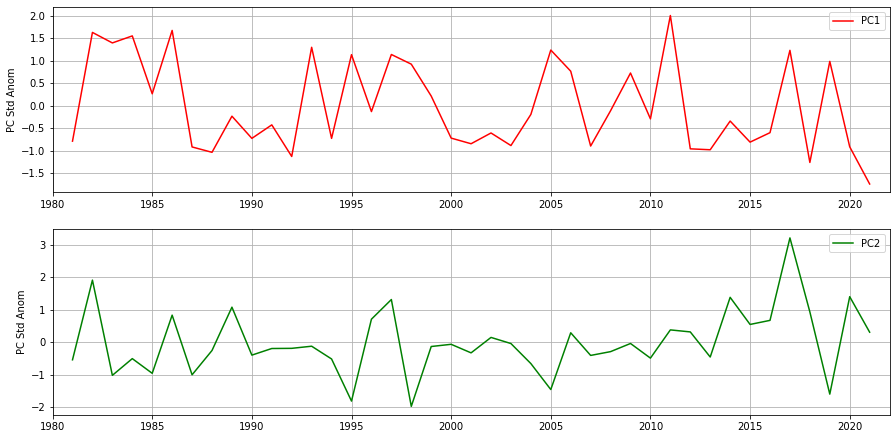

In [16]:
fig,(ax1,ax2)= plt.subplots(2,1,figsize=(15,7.5))
t = snow['YEAR']
ax1.plot(t,principal_components[:, 0],label='PC1',color='red')
ax2.plot(t,principal_components[:, 1],label='PC2',color='green')
ax1.set_ylabel('PC Std Anom')
ax1.set(xlim=(1980,2022))
ax1.grid()
ax1.legend()
ax2.set_ylabel('PC Std Anom')
ax2.set(xlim=(1980,2022))
ax2.grid()
ax2.legend()
plt.savefig('figure_4.13.png')

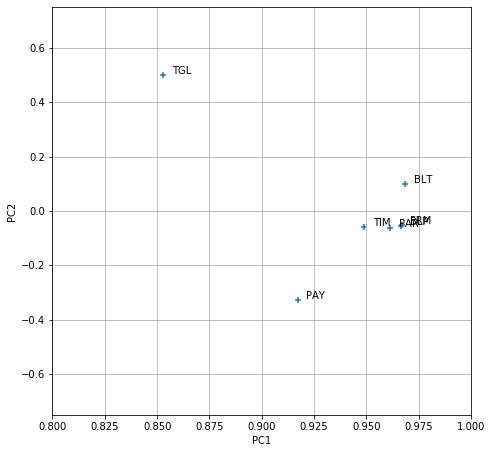

In [17]:
fig,ax1= plt.subplots(1,1,figsize=(7.5,7.5))

ax1.scatter(principal_axes[:, 0],principal_axes[:, 1],marker='+')
for i in range(nos):
    ax1.text(x=principal_axes[i, 0]+.004,y=principal_axes[i, 1]+.004,s=stns[i+1])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set(xlim=(.8,1))
ax1.set(ylim=(-.75,.75))
ax1.grid()
plt.savefig('figure_4.14.png')